<a href="https://colab.research.google.com/github/tsherburne/de-textbook/blob/main/chapters/01-intro/02_SCRE_Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Notebook

In [2]:
!pip install requests plantuml
import requests
import plantuml
from IPython.display import Image
import pandas as pd
from google.colab import data_table
import ipywidgets as widgets
from IPython.display import display
import csv
import sys

In [3]:
attributeDict = {}
attributeDict['name'] = '743d424c-daae-4dc9-887c-a8c92b9f08a4'
attributeDict['number'] = '8a676ae6-2e9c-4f15-a037-b38d623adc1c'
attributeDict['description'] = '5d4a1782-8b0e-4b5d-b0f2-a0985f01c817'
attributeDict['priority'] ='3f58efe8-90f1-4793-9573-9575d580cb31'
attributeDict['variationType'] = 'a00302c6-3a7f-40e6-b382-88ab33cacca9'
attributeDict['component:title'] ='e70c8e32-8ed9-4c69-93d1-ec873ae22e8a'
attributeDict['ca:title'] ='2a855444-2ddb-42a1-a04f-625f120cec26'

sortBlockDict = {}
sortBlockDict['Numeric'] = '78b85fc0-3aec-442d-95b9-2b291bd4d1bc'

folderDict = {}
folderDict['ControlAction'] = '44d0db15-c706-402b-9bf4-9b235d6e4fad'
folderDict['Loss'] = '13f1f878-b40c-4c7a-a4e0-e348e4278d9d'
folderDict['Hazard'] = 'a05af43e-ac3c-41ec-b17f-b0d30fff9a75'
folderDict['HazardousAction'] = 'dd2870d1-a9ab-4c26-a1cf-d3efda1248ef'
folderDict['LossScenario'] = 'f2d515b4-387b-4b22-a584-bf5ec58cf90b'

relationDict = {}
relationDict['ma: leads to'] = '9ee3b2ea-eaa9-4a02-ae33-cc11bb682167'
relationDict['ma: is caused by'] = 'e734cdba-7143-4b37-9478-5b62497543f3'
relationDict['ma: variation of'] = '39a672b3-e1d1-4005-a4d4-6a6e45a847fa'
relationDict['ma: has variation'] = '59e2ba52-0282-466c-8727-2e2835f741af'
relationDict['categorizes'] = '059208ef-009a-47b8-ae18-d8d93b71ea68'
relationDict['categorized by'] = 'c2138bd9-06db-4146-bef2-1bbdeb5b6732'
relationDict['built from'] = '6a545e1a-9052-4299-84bb-74ca62d532ad'
relationDict['built in'] = '262f160b-c3a0-4207-9ba0-89ca78de45bf'

entityDict = {}
entityDict['ControlAction'] = '44d0db15-c706-402b-9bf4-9b235d6e4fad'
entityDict['Loss'] = '13f1f878-b40c-4c7a-a4e0-e348e4278d9d'
entityDict['Hazard'] = 'a05af43e-ac3c-41ec-b17f-b0d30fff9a75'
entityDict['HazardousAction'] = 'dd2870d1-a9ab-4c26-a1cf-d3efda1248ef'
entityDict['Category'] = '40f7201d-af5b-463b-a10e-65d5db180b96'

hcaTypes = ['Providing', 'NotProviding', 'TooEarlyTooLate']

def getCategoryId (name):
  # fetch categories
  r = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/entities/byclass/' + entityDict['Category'] + '?sortBlockId=' + 
                 sortBlockDict['Numeric'], headers=headers)
  catId = ""
  if r.status_code == 200:
    categories = r.json()['results']
    status = 404
    for category in categories:
      for attr in category['attributes']:
        #print(attr)
        if attr['definitionId'] == attributeDict['name']:
          if attr['value'] is not None:
            if attr['value']['value'] == name:
              status = 200
              break
      if status == 200:
        catId = category['id']
        break
  else:
    status = r.status_code
    print('Error Fetching Categories: ' + str(r.status_code))

  return status, catId


# Login

In [4]:
#@title Enter Credentials

id = widgets.Text(
    value='',
    placeholder='Enter username',
    description='User Name:',
    disabled=False
)
pwd = widgets.Password(
    value='',
    placeholder='Enter password',
    description='Password:',
    disabled=False
)
display(id)
display(pwd)

login = widgets.Button(
    description="Login", 
    tooltip="Enter User Name and Password - then click to Login.",
    button_style='success'
)
output = widgets.Output()
display(login, output)

global headers, base_url
headers = ""
base_url = ""

def on_login(b):
  global headers, base_url
  with output:
    output.clear_output()

    base_url = 'https://genesys.mission-aware.net/api/v1/'
    # authenticate
    payload = {'grant_type': 'password', 'username': id.value, 'password': pwd.value}
    r = requests.post(base_url + 'token', data=payload)
    del payload
    if r.status_code == 200:
      print("Login Success!")
      id.value = ""
      pwd.value = ""
      # save access token for future requests
      access_token = 'bearer ' + r.json()['access_token']
      headers = {'Authorization': access_token}
    else:
      print("Login Failed: " + str(r.status_code))

login.on_click(on_login)

Text(value='', description='User Name:', placeholder='Enter username')

Password(description='Password:', placeholder='Enter password')

Button(button_style='success', description='Login', style=ButtonStyle(), tooltip='Enter User Name and Password…

Output()

In [5]:
#@title Select Project
global headers, base_url
projectList = []
projectDict = {}

r = requests.get(base_url + 'projects', headers=headers)
if r.status_code == 200:
  projects = r.json()['results']
  
  for proj in projects:
    projectList.append(proj['name'])
    projectDict[proj['name']] = proj['id']
  
  projectList.sort()
  firstProj = projectList[0]

  proj = widgets.Select(
    options=projectList,
    value=firstProj,
    # rows=10,
    description='Project:',
    disabled=False
  )
  display(proj)
else:
  print("Request Failed: " + str(r.status_code))

Select(description='Project:', options=('Cube-Sat', 'Silverfish', 'Sim-Gen'), value='Cube-Sat')

# Operational Risk Assessment


## Control Structure PlantUML Source

In [52]:
%%writefile control_structure.txt
skinparam roundCorner 15
scale .75
@startuml
person C2
person Operator as OP
person Technician as TECH
person "Physical Attacker" as PA
rectangle Silverfish {
  rectangle "Control Station" as CS
  rectangle Obstacle as OBS {
      rectangle Munition as MUN
      rectangle "Seismic Sensor" as SS
  } 
  rectangle "IR Sensor" as IR
}
rectangle UAV

C2 -do-> TECH #blue;line.bold;text:blue : <&caret-bottom>TN:Deploy\n<&caret-bottom>TN:Undeploy
C2 -do-> OP #blue;line.bold;text:blue : <&caret-bottom>OP:Engage\n<&caret-bottom>OP:Disengage
C2 -do-> UAV #blue;line.bold;text:blue : <&caret-bottom>UAV:Position

OP -do-> CS #blue;line.bold;text:blue : <&caret-bottom>CS:Fire
CS -do-> MUN #blue;line.bold;text:blue : <&caret-bottom>MUN:Fire
MUN -do-> PA #blue;line.bold;text:blue : <&caret-bottom>PA:Blast

TECH -do-> CS #blue;line.bold;text:blue : <&caret-bottom>CS:Upgrade\n<&caret-bottom>CS:Position
CS -do-> OBS #blue;line.bold;text:blue : <&caret-bottom>OBS:Upgrade\n<&caret-bottom>OBS:Position

CS -up-> OP #green;line.bold;text:green : <&caret-top>CS:Grid Status
UAV -up-> CS #green;line.bold;text:green : <&caret-top>UAV:Image
IR -up-> CS #green;line.bold;text:green : <&caret-top>IR:Analytics
SS -up-> CS #green;line.bold;text:green : <&caret-top>SS:Analytics

PA -up-> UAV #green;line.bold;text:green : <&caret-top>UAV:Signature
PA -up-> IR #green;line.bold;text:green : <&caret-top>IR:Signature
PA -up-> SS #green;line.bold;text:green : <&caret-top>SS:Signature

footer **<color blue><&caret-bottom>Control Action</color>  <color green><&caret-top>Feedback</color>**
@enduml

Writing control_structure.txt


## Generate Control Structure Diagram

In [50]:
##@markdown Definition: A ***hierarchical control structure*** is a system 
##@markdown model that is composed of feedback control loops. An effective 
##@markdown control structure will enforce constraints on the behavior of the 
##@markdown overall system.

compByName = {}
compById = {}
compList = []

status, catId = getCategoryId("STPA: Control Structure")
if status != 200:
  sys.exit("Failed to fetch control structure category: " + str(status))

# fetch 'categorized' components
r = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
            '/entities/' + catId + 
            '/relationshiptargets/' + relationDict['categorizes'] +
            '?sortBlockId=' + sortBlockDict['Numeric'], headers=headers)
if r.status_code != 200:
  sys.exit("Failed to fetch categorized components: " + str(r.status_code))

# collect all components using Title
components = r.json()['results']
for component in components:
  for attr in component['attributes']:
    if attr['definitionId'] == attributeDict['component:title']:
      if attr['value'] is not None:
        compList.append(attr['value']['value'])
        compEntry = {}
        compEntry['id'] = component['id']
        compEntry['processed'] = False
        compByName[attr['value']['value']] = compEntry
        compById[component['id']] = attr['value']['value']
        break
print(compByName)

# output components using 'built from'
with open('cs.txt', 'w') as f:
  f.write('skinparam roundCorner 15\n')
  f.write('scale .75\n')
  f.write('@startuml\n')
  
  compList.sort()
  for component in compList:
    print(component)
    if compByName[component]['processed'] == False:
      f.write('component ' + component + '\n')
      compByName[component]['processed'] = True

    # fetch 'built from' components
    r = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                '/entities/' + compByName[component]['id'] + 
                '/relationshiptargets/' + relationDict['built from'] +
                '?sortBlockId=' + sortBlockDict['Numeric'], headers=headers)
    if r.status_code != 200:
      sys.exit("Failed to fetch built from components: " + str(r.status_code))
    components = r.json()['results']
    for component in components:
      for attr in component['attributes']:
        if attr['definitionId'] == attributeDict['name']:
          if attr['value'] is not None:
            print('  ' + attr['value']['value'])
  f.write('@enduml\n')

#!python3 -m plantuml control_structure.txt > /dev/null
#Image(filename='control_structure.png') 

{'Silverfish': {'id': '6f0e124a-3479-4926-b548-859a4ead5948', 'processed': False}, 'Control Station': {'id': 'e7363630-cf4e-4d06-bd54-602461f59c12', 'processed': False}, 'IR Sensor': {'id': 'ec77c38d-88cc-46c1-8d53-3f2e04cc766d', 'processed': False}, 'Obstacle': {'id': '3486097b-c4bd-41bf-b447-0bab4ee3dc3b', 'processed': False}, 'Munition': {'id': '32e5251e-fe2e-46a7-9dfe-feb0b23a222d', 'processed': False}, 'Seismic Sensor': {'id': '404fa586-709c-4e22-86ad-33c719a4e709', 'processed': False}, 'Physical Attacker': {'id': '6d03ecd6-dd8f-46c6-a180-06ba16b4c2d4', 'processed': False}, 'C2': {'id': '9169360b-7847-4602-bf4c-8cbf386f260c', 'processed': False}, 'Technician': {'id': '9f413bee-aa35-48b0-8e58-8ac0600bbd5a', 'processed': False}, 'Operator': {'id': '8a2f92d0-5e1b-42e3-a987-0b61010c4ef1', 'processed': False}, 'UAV': {'id': 'd13374f5-fcf6-4d0b-bfec-d31300832aaa', 'processed': False}}
C2
  _System Context
Control Station
  _SF: Silverfish
  FC: User Interface
  FC: MQTT
  FC: Applicatio

## Control Structure Diagram


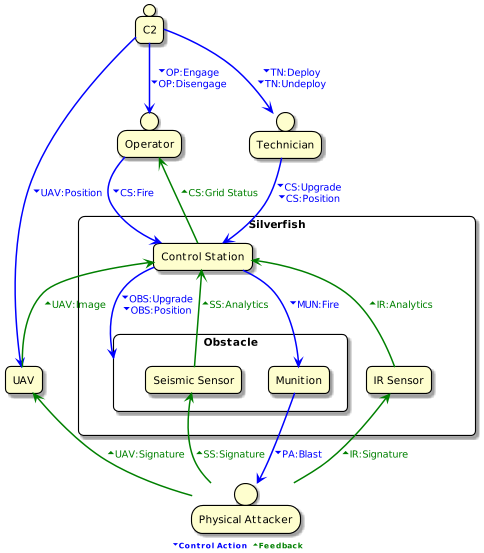

In [ ]:
#@markdown Definition: A ***hierarchical control structure*** is a system 
#@markdown model that is composed of feedback control loops. An effective 
#@markdown control structure will enforce constraints on the behavior of the 
#@markdown overall system.
!python3 -m plantuml control_structure.txt > /dev/null
Image(filename='control_structure.png') 

In [75]:
#@markdown System Control Actions
status, catId = getCategoryId("STPA: Control Action")
if status != 200:
  sys.exit("Failed to fetch control action category: " + str(status))

# fetch 'categorized' control actions
r = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
            '/entities/' + catId + 
            '/relationshiptargets/' + relationDict['categorizes'] +
            '?sortBlockId=' + sortBlockDict['Numeric'], headers=headers)
if r.status_code != 200:
  sys.exit("Failed to fetch categorized control actions: " + str(r.status_code))

caList = []
with open('ca.csv', 'w', newline='') as f:
  # create the csv writer
  writer = csv.writer(f)
  header = ['Control Action', 'Description']
  writer.writerow(header)

  # collect all control actions using Title
  cas = r.json()['results']
  for ca in cas:
    caTitle = ""
    caDescription = ""
    for attr in ca['attributes']:
      if attr['definitionId'] == attributeDict['ca:title']:
        if attr['value'] is not None:
          caTitle = attr['value']['value']
          caList.append(caTitle)
      if attr['definitionId'] == attributeDict['description']:
        if attr['value'] is not None:
          caDescription = attr['value']['value']['plainText']
    # write csv row
    writer.writerow([caTitle, caDescription])
caList.sort()
data_table.DataTable(pd.read_csv('ca.csv'), include_index=False)

,Control Action,Description
0,TN:Deploy,Command & Control voice instruction to deploy ...
1,TN:UnDeploy,Command & Control voice instruction to un-depl...
2,OP:Engage,Command & Control voice instruction to engage ...
3,OP:Disengage,Command & Control voice instruction to disenga...
4,UAV:Position,Command & Control navigation control to positi...
5,OP:Fire,Operator request to Fire one or more munitions.
6,MUN:Fire,Control Station message to Obstacle Munition t...
7,PA:Blast,Munition kinetic blast towards physical attacker.
8,CS:Upgrade,Technician request to upgrade SW before deploy...
9,OBS:Upgrade,Control Station message to upgrade component SW.


## STPA Losses, Hazards, & Hazardous Control Actions

In [7]:
#@title System Losses
#@markdown Definition: A ***Loss*** involves something of value to stakeholders. 
#@markdown Losses may include a loss of human life or human injury, property damage, 
#@markdown environmental pollution, loss of mission, loss of reputation, loss or leak of 
#@markdown sensitive information, or any other loss that is unacceptable to the stakeholders.

# fetch losses
r = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/folders/' + folderDict['Loss'] + '/entities?sortBlockId=' + 
                 sortBlockDict['Numeric'], headers=headers)

if r.status_code == 200:
  with open('losses.csv', 'w', newline='') as f:
    # create the csv writer
    writer = csv.writer(f)
    header = ['ID', 'Title', 'Priority', 'is caused by: Hazard']
    writer.writerow(header)
    losses = r.json()['results']
    for loss in losses:
      lossId = ""
      lossName = ""
      lossDescription = ""
      lossPriority = ""
      for attr in loss['attributes']:
        #print(attr)
        if attr['definitionId'] == attributeDict['number']:
          if attr['value'] is not None:
            lossId = attr['value']['value']
        elif attr['definitionId'] == attributeDict['name']:
          if attr['value'] is not None:
            lossName = attr['value']['value']
        elif attr['definitionId'] == attributeDict['description']:
          if attr['value'] is not None:
            lossDescription = attr['value']['value']['plainText']
        elif attr['definitionId'] == attributeDict['priority']:
          if attr['value'] is not None:
            lossPriority = attr['value']['value']['value']
      # fetch related hazards (ma: is caused by)
      r2 = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/entities/' + loss['id'] + 
                 '/relationshiptargets/' + relationDict['ma: is caused by'] +
                 '?sortBlockId=' + sortBlockDict['Numeric'], headers=headers)
      if r2.status_code == 200:
        hazards = r2.json()['results']
        first = True
        hazardList = ""
        for hazard in hazards:
          for attr in hazard['attributes']:
            if attr['definitionId'] == attributeDict['number']:
              if attr['value'] is not None:
                if first == True:
                  first = False
                else:
                  hazardList += ','
                hazardList += attr['value']['value']              
        #print(hazardList)
      else:
        print("Error Fetching Related Hazards: " + str(r2.status_code))

      # write csv row
      writer.writerow([lossId,lossName,lossPriority,hazardList])
else:
  print("Error Fetching Losses: " + str(r.status_code))

data_table.DataTable(pd.read_csv('losses.csv'), include_index=False)

,ID,Title,Priority,is caused by: Hazard
0,L.1,Loss of life or serious injury to military.,1,"H.1,H.2,H.3"
1,L.2,Loss of life or serious injury to civilian.,1,H.1
2,L.3,Loss of protected area assets.,2,"H.1,H.2"
3,L.4,Loss of classified mission HW / SW.,3,H.3


In [8]:
#@title System Hazards
#@markdown Definition: A ***Hazard*** is a system state or set of conditions 
#@markdown that, together with a particular set of worst-case environmental 
#@markdown conditions, will lead to a loss.
# fetch hazards
r = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/folders/' + folderDict['Hazard'] + '/entities?sortBlockId=' + 
                 sortBlockDict['Numeric'], headers=headers)

if r.status_code == 200:
  with open('hazards.csv', 'w', newline='') as f:
    # create the csv writer
    writer = csv.writer(f)
    header = ['ID', 'Title', 'Description', 'leads to: Loss', 'is caused by: Hazardous Action']
    writer.writerow(header)
    hazards = r.json()['results']
    for hazard in hazards:
      hazardId = " "
      hazardName = " "
      hazardDescription = " "
      for attr in hazard['attributes']:
        #print(attr)
        if attr['definitionId'] == attributeDict['number']:
          if attr['value'] is not None:
            hazardId = attr['value']['value']
        elif attr['definitionId'] == attributeDict['name']:
          if attr['value'] is not None:
            hazardName = attr['value']['value']
        elif attr['definitionId'] == attributeDict['description']:
          if attr['value'] is not None:
            hazardDescription = attr['value']['value']['plainText']
      # fetch related losses (ma: leads to)
      r2 = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/entities/' + hazard['id'] + 
                 '/relationshiptargets/' + relationDict['ma: leads to'] +
                 '?sortBlockId=' + sortBlockDict['Numeric'], headers=headers)
      if r2.status_code == 200:
        losses = r2.json()['results']
        first = True
        lossList = " "
        for loss in losses:
          if loss['entityDefinitionId'] == entityDict['Loss']:
            for attr in loss['attributes']:
              if attr['definitionId'] == attributeDict['number']:
                if attr['value'] is not None:
                  if first == True:
                    first = False
                  else:
                    lossList += ','
                  lossList += attr['value']['value']              
        #print(lossList)
      else:
        print("Error Fetching Related Hazards: " + str(r2.status_code))

      # fetch related hazardous control actions (ma: is caused by)
      r2 = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/entities/' + hazard['id'] + 
                 '/relationshiptargets/' + relationDict['ma: is caused by'] +
                 '?sortBlockId=' + sortBlockDict['Numeric'], headers=headers)
      if r2.status_code == 200:
        hcas = r2.json()['results']
        first = True
        hcaList = " "
        for hca in hcas:
          if hca['entityDefinitionId'] == entityDict['HazardousAction']:
            for attr in hca['attributes']:
              if attr['definitionId'] == attributeDict['number']:
                if attr['value'] is not None:
                  if first == True:
                    first = False
                  else:
                    hcaList += ','
                  hcaList += attr['value']['value']              
        #print(hcaList)
      else:
        print("Error Fetching Related HCA: " + str(r2.status_code))
      # write csv row
      writer.writerow([hazardId,hazardName,hazardDescription,lossList,hcaList])
else:
  print("Error Fetching Losses: " + str(r.status_code))

data_table.DataTable(pd.read_csv('hazards.csv'), include_index=False)

,ID,Title,Description,leads to: Loss,is caused by: Hazardous Action
0,H.1,Weapon Misfire,"Incorrect, or no weapon, is fired.","L.1,L.2,L.3","HCA.1,HCA.2"
1,H.2,Slow Deploy,Excessive time and/or personnel to deploy system.,"L.1,L.3",HCA.3
2,H.3,Slow Un-Deploy,Excessive time and/or personnel to un-deploy s...,"L.1,L.4",


In [77]:
#@title System Hazardous Control Actions
#@markdown Definition: A ***Hazardous Control Action (HCA)*** is a control action that, 
#@markdown in a particular context and worst-case environment, will lead to a hazard.
#@markdown 
#@markdown There are four ways ***(variation type)*** a control action can be hazardous:
#@markdown 1. Not providing the control action leads to a hazard.
#@markdown 2. Providing the control action leads to a hazard.
#@markdown 3. Providing a potentially safe control action but too early, too late, or in the wrong order
#@markdown 4. The control action lasts too long or is stopped too soon (for continuous control actions, not discrete ones).
#@markdown > To filter rows NOT containing \<string>
#@markdown ```
#@markdown ^((?!<string>).)*$
#@markdown ```

# fetch hca
r = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/folders/' + folderDict['HazardousAction'] + '/entities?sortBlockId=' + 
                 sortBlockDict['Numeric'], headers=headers)
caVariationDict = {}
hazardousCAList = []

if r.status_code == 200:
  with open('hca.csv', 'w', newline='') as f:
    # create the csv writer
    writer = csv.writer(f)
    header = ['ID', 'Title', 'Description', 'Variation Type', 'leads to: Hazard', 
              'is variation of: Control Action']
    writer.writerow(header)
    hcas = r.json()['results']
    for hca in hcas:
      hcaId = " "
      hcaName = " "
      hcaDescription = " "
      hcaVariationType = " "
      for attr in hca['attributes']:
        #print(attr)
        if attr['definitionId'] == attributeDict['number']:
          if attr['value'] is not None:
            hcaId = attr['value']['value']
        elif attr['definitionId'] == attributeDict['name']:
          if attr['value'] is not None:
            hcaName = attr['value']['value']
        elif attr['definitionId'] == attributeDict['description']:
          if attr['value'] is not None:
            hcaDescription = attr['value']['value']['plainText']
        elif attr['definitionId'] == attributeDict['variationType']:
          if attr['value'] is not None:
            hcaVariationType = attr['value']['value']['value']
      hazardousCAList.append(hcaId)
      # fetch related losses (ma: leads to)
      r2 = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/entities/' + hca['id'] + 
                 '/relationshiptargets/' + relationDict['ma: leads to'] +
                 '?sortBlockId=' + sortBlockDict['Numeric'], headers=headers)
      if r2.status_code == 200:
        hazards = r2.json()['results']
        first = True
        hazardList = " "
        for hazard in hazards:
          if hazard['entityDefinitionId'] == entityDict['Hazard']:
            for attr in hazard['attributes']:
              if attr['definitionId'] == attributeDict['number']:
                if attr['value'] is not None:
                  if first == True:
                    first = False
                  else:
                    hazardList += ','
                  hazardList += attr['value']['value']              
        #print(hazardList)
      else:
        print("Error Fetching Related Hazards: " + str(r2.status_code))

      # fetch related control actions (ma: is variation of)
      r2 = requests.get(base_url + 'projects/' + projectDict[proj.value] + 
                 '/entities/' + hca['id'] + 
                 '/relationshiptargets/' + relationDict['ma: variation of'] +
                 '?sortBlockId=' + sortBlockDict['Numeric'], headers=headers)
      if r2.status_code == 200:
        controlActions = r2.json()['results']
        first = True
        relatedCAList = " "
        for controlAction in controlActions:
          if controlAction['entityDefinitionId'] == entityDict['ControlAction']:
            for attr in controlAction['attributes']:
              if attr['definitionId'] == attributeDict['ca:title']:
                if attr['value'] is not None:
                  if first == True:
                    first = False
                  else:
                    relatedCAList += ','
                  relatedCAList += attr['value']['value']
                  caVariationDict[attr['value']['value'] + ':' + hcaVariationType] = hcaId
        #print(relatedCAList)
      else:
        print("Error Fetching Related CA: " + str(r2.status_code))
      # write csv row
      writer.writerow([hcaId,hcaName,hcaDescription,hcaVariationType, 
                       hazardList,relatedCAList])
else:
  print("Error Fetching HCAs: " + str(r.status_code))

data_table.DataTable(pd.read_csv('hca.csv'), include_index=False)

,ID,Title,Description,Variation Type,leads to: Hazard,is variation of: Control Action
0,HCA.0.0,NA - Not Providing,Not Applicable - Control Action (Not Providing...,NotProviding,,
1,HCA.0.1,NA - Providing,Not Applicable - Control Action (Providing) va...,Providing,,
2,HCA.0.2,NA - Too Early / Too Late,Not Applicable - Control Action (Too Early / ...,TooEarlyTooLate,,
3,HCA.0.3,NA - Too Long / Too Soon,Not Applicable - Control Action (Too Long / To...,TooLongTooSoon,,
4,HCA.1,Incorrect Fire,Something other than the operator selected mun...,Providing,H.1,MUN:Fire
5,HCA.2,No Fire,Operator does not fire munition / obstacle whe...,NotProviding,H.1,OP:Fire
6,HCA.3,Unable to set Location,"During deployment, the location can not be set.",NotProviding,H.2,OBS:Position


In [78]:
#@title Control Action Analysis

#@markdown Although all four variation types should be considered, they may not all 
#@markdown be applicable in every case (see HCA.0 and 'justification'). It is also possible 
#@markdown to identify several HCAs for a single variation type.
#@markdown In general, each CA / variation type may define 0 or more HCAs.

with open('caa.csv', 'w', newline='') as f:
  # create the csv writer
  writer = csv.writer(f)
  header = ['Control Action', 'Variation', 'has variation: Hazardous Action', 
            'has variation: .justification']
  writer.writerow(header)

  for ca in caList:
    for hcaType in hcaTypes:
      if (ca + ':' + hcaType) in caVariationDict:
        writer.writerow([ca,hcaType,caVariationDict[ca + ':' + hcaType],' '])
      else:
        writer.writerow([ca,hcaType,' ',' '])

data_table.DataTable(pd.read_csv('caa.csv'), include_index=False)

,Control Action,Variation,has variation: Hazardous Action,has variation: .justification
0,CS:Position,Providing,,
1,CS:Position,NotProviding,,
2,CS:Position,TooEarlyTooLate,,
3,CS:Upgrade,Providing,,
4,CS:Upgrade,NotProviding,,
5,CS:Upgrade,TooEarlyTooLate,,
6,MUN:Fire,Providing,HCA.1,
7,MUN:Fire,NotProviding,,
8,MUN:Fire,TooEarlyTooLate,,
9,OBS:Position,Providing,,


In [69]:
#@title Control Action Analysis Editor
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

def on_save(b):
  print("Saving....")

save = Button(description='Save', button_style='success')
save.on_click(on_save)

form_items = [
    Box([Label(value='Control Action:'),
         Dropdown(options=caList)], layout=form_item_layout),
    Box([Label(value='Variation Type:'),
         Dropdown(options=hcaTypes)], layout=form_item_layout),
    Box([Label(value='Hazardous Action:'),
         Dropdown(options=hazardousCAList)], layout=form_item_layout),
    Box([Label(value='Justification:'),
         Textarea()], layout=form_item_layout),
    Box([Label(value='Operation:'),
        save], layout=form_item_layout)
]
form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='30%'
))
form

Box(children=(Box(children=(Label(value='Control Action:'), Dropdown(options=('CS:Position', 'CS:Upgrade', 'MU…